In [1]:
import pandas as pd

# Data Exploration

## Training set

In [2]:
# read file 
df_train = pd.read_csv('./dataset/train.csv')
df_train.head()

,tweet_id,sentiment
0,1213084822521950209,neutral
1,1213011490372038656,neutral
2,1213763702715043840,mixed
3,1213764224356421633,neutral
4,1212766574337150976,positive


<AxesSubplot:>

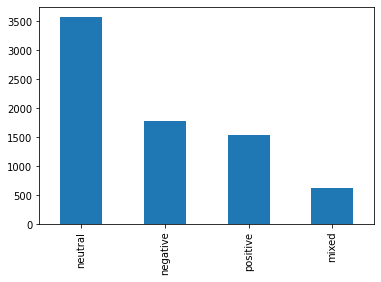

In [3]:
# count the number of neutral mixed and positive sentiments
df_train["sentiment"].value_counts().plot.bar()

## Testing set

In [4]:
# read file 
df_test = pd.read_csv('./dataset/test.csv')
df_test.head()

,tweet_id,sentiment
0,1213842050455654402,neutral
1,1215480766295171072,neutral
2,1222950264812064768,positive
3,1213967203076395009,negative
4,1213961696840171521,neutral


<AxesSubplot:>

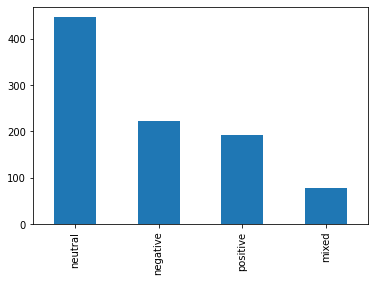

In [5]:
# count the number of neutral mixed and positive sentiments
df_test["sentiment"].value_counts().plot.bar()

## Dev/validation set

In [6]:
# read file 
df_dev = pd.read_csv('./dataset/dev.csv')
df_dev.head()

,tweet_id,sentiment
0,1214005466675777536,neutral
1,1213261378397409280,mixed
2,1213846984349626369,neutral
3,1216365312561635333,positive
4,1213234381768265728,neutral


<AxesSubplot:>

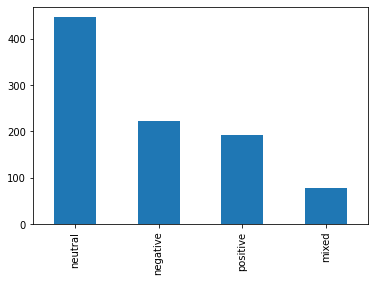

In [7]:
# count the number of neutral mixed and positive sentiments
df_dev["sentiment"].value_counts().plot.bar()

# Get summary for each csv file

In [8]:
df_train.describe()

,tweet_id
count,7.511000e+03
mean,1.211541e+18
std,5.158181e+15
min,1.200913e+18
25%,1.212290e+18
50%,1.212968e+18
75%,1.214013e+18
max,1.278426e+18


### The tweet_id is of type int64 and sentiment is type object

In [9]:
df_train.dtypes

tweet_id      int64
sentiment    object
dtype: object

In [10]:
#convert sentiment column to category type for label encoding
df_train["sentiment"] = df_train["sentiment"].astype('category')
df_train.dtypes

tweet_id        int64
sentiment    category
dtype: object

In [11]:
# use cat.code to encode each variable
df_train["sentiment_cat"] = df_train["sentiment"].cat.codes
df_train.head()

,tweet_id,sentiment,sentiment_cat
0,1213084822521950209,neutral,2
1,1213011490372038656,neutral,2
2,1213763702715043840,mixed,0
3,1213764224356421633,neutral,2
4,1212766574337150976,positive,3


In [25]:
#now do summary on the updated dataframe
df_train.describe()

,tweet_id,sentiment_cat
count,7.511000e+03,7511.000000
mean,1.211541e+18,1.801491
std,5.158181e+15,0.857102
min,1.200913e+18,0.000000
25%,1.212290e+18,1.000000
50%,1.212968e+18,2.000000
75%,1.214013e+18,2.000000
max,1.278426e+18,3.000000


## code to extract the tweets for each tweet id

In [24]:
len(df_test)

939

In [26]:
#in extract_tweet.py file